In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


In [2]:
# Handy to preset some plotting style guidelines:

#plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 3
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 24

In [3]:
df = pd.read_csv('PK_search_rates.csv',sep='\t',header=None)

In [5]:
df.columns = ['dt','h','cc','search_cnt','results_cnt','hit_rate']

In [11]:
def add_date_num(df,dt,fmtstr): # and sorts
    df['date_num'] = df.apply(lambda row:
                          matplotlib.dates.date2num(
                          datetime.strptime(
                          str(row['dt']).strip()+' '+str(row['h']).strip(),fmtstr
                          )
                          ),axis=1)
    df.sort_values(by=['date_num'],inplace=True)
    
add_date_num(df,"date","%Y%m%d %H")


In [12]:
df.head()

,dt,h,cc,search_cnt,results_cnt,hit_rate,date_num
0,20190220,0,PK,145332,73561,0.506158,737110.000000
1,20190220,1,PK,156518,87766,0.560741,737110.041667
2,20190220,2,PK,156960,108696,0.692508,737110.083333
3,20190220,3,PK,210123,161871,0.770363,737110.125000
4,20190220,4,PK,340384,273835,0.804488,737110.166667


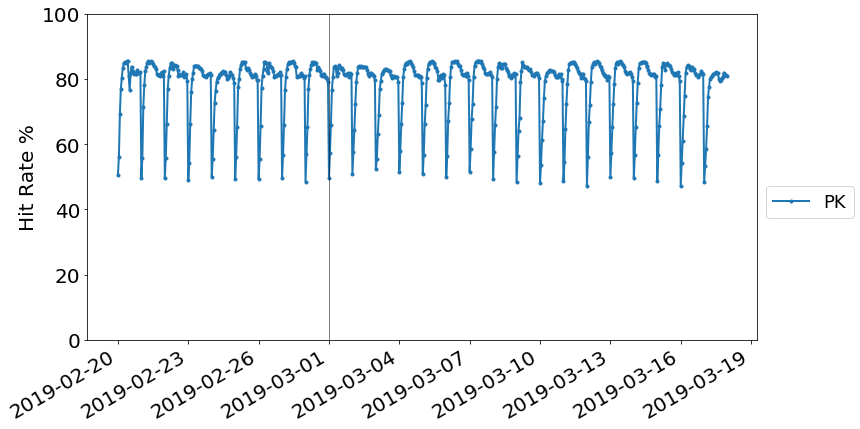

In [26]:
# Plot hit rates for PK
plt.figure(figsize=(12,6))
plt.ylabel('Hit Rate %')
#plt.yscale('log')
plt.ylim([0,100])
countries = ['PK']
change_date = matplotlib.dates.date2num( datetime.strptime(
                                          '20190301 0',"%Y%m%d %H")
                                       )

for yval in ['hit_rate']:
    for country in countries:
        #yval = 'num_calls_spamid'
        cut = (df['cc']==country)
        dfc = df[cut]
        #color = 'green' if country=='IN' else 'blue'
        #print(country,dfc[dfc['date_num']<=change_date][yval].mean())
        #print(country,dfc[(dfc['date_num']> change_date) & (dfc['date_num']<= change_date2)][yval].mean())
        #print(country,dfc[dfc['date_num']> change_date2][yval].mean())
        plt.plot_date(dfc['date_num'], dfc[yval].astype(float)*1e2, ls='-',lw=2,label=country)

        
plt.axvline(x=change_date,color='black',linestyle='-',lw=0.5)
#plt.text(change_date-0.50, 45., 'March 1st', fontsize=16,rotation=90)
'''
plt.axvline(x=change_date2,color='black',linestyle='-',lw=0.5)
plt.text(change_date2-0.50, 40., 'No Yelp', fontsize=16,rotation=90)
'''

plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right')
plt.legend(loc='best',prop={"size": 18},bbox_to_anchor=(1, 0.5))
plt.show()

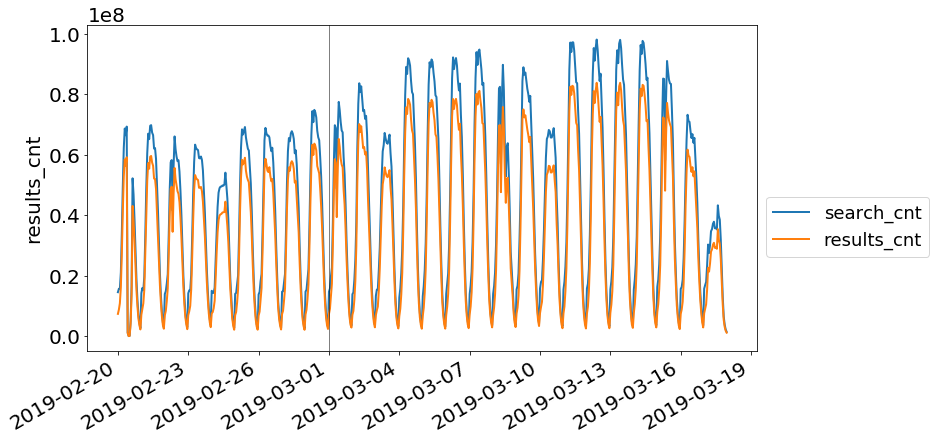

In [24]:
# Plot hit rates for PK
plt.figure(figsize=(12,6))
#plt.yscale('log')
#plt.ylim([0,100])
countries = ['PK']
change_date = matplotlib.dates.date2num( datetime.strptime(
                                          '20190301 0',"%Y%m%d %H")
                                       )

for yval in ['search_cnt','results_cnt']:
    plt.ylabel(yval)
    for country in countries:
        #yval = 'num_calls_spamid'
        cut = (df['cc']==country)
        dfc = df[cut]
        #color = 'green' if country=='IN' else 'blue'
        #print(country,dfc[dfc['date_num']<=change_date][yval].mean())
        #print(country,dfc[(dfc['date_num']> change_date) & (dfc['date_num']<= change_date2)][yval].mean())
        #print(country,dfc[dfc['date_num']> change_date2][yval].mean())
        plt.plot_date(dfc['date_num'], dfc[yval].astype(float)*1e2, marker='',ls='-',lw=2,label=yval)

        
plt.axvline(x=change_date,color='black',linestyle='-',lw=0.5)
#plt.text(change_date-0.50, 45., 'March 1st', fontsize=16,rotation=90)
'''
plt.axvline(x=change_date2,color='black',linestyle='-',lw=0.5)
plt.text(change_date2-0.50, 40., 'No Yelp', fontsize=16,rotation=90)
'''

plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right')
plt.legend(loc='best',prop={"size": 18},bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
df = pd.read_csv('PK_search_rates.csv',sep='\t',header=None)